# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$ \hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [1]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data = data.drop_duplicates()

df = data.copy()
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
df['user_id'] = "UID_" + data.user_id.astype('str')
df['item_id'] = "IID_" + data.item_id.astype('str')

In [3]:
print("user_id : ", data.user_id.shape)
print("item_id : ", data.item_id.shape)
print("rating : ", data.rating.shape)

print("unique user_id : ", data.user_id.unique().shape)
print("unique item_id : ", data.item_id.unique().shape)
print("unique rating : ", data.rating.unique().shape)

user_id :  (89992,)
item_id :  (89992,)
rating :  (89992,)
unique user_id :  (943,)
unique item_id :  (1662,)
unique rating :  (5,)


<font color='red'>Create your adjacency matrix </font>

In [4]:
import numpy as np

table = pd.pivot(data, index='user_id', columns='item_id', values='rating')
table[np.isnan(table.values)] = 0
print(table.shape)

user_ids = list(table.index)
item_ids = list(table.columns)
ratings = table.values

(943, 1662)


In [5]:
from scipy.sparse import csr_matrix
from networkx.algorithms import bipartite
import networkx as nx

# Initialise the graph
B = nx.Graph()# Add nodes with the node attribute "bipartite"

top_nodes = df['user_id'].values.tolist()
bottom_nodes = df['item_id'].values.tolist()

B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)# Add edges with weights

for i in df.itertuples():
    B.add_edge(i[1], i[2], weight = i[3])#Obtain the minimum weight full matching
    
print(nx.is_connected(B))

A = (B.subgraph(c) for c in nx.connected_components(B))
A = list(A)[0]

print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

True
number of nodes 2605
number of edges 89992


In [6]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 2605
Number of edges: 89992
Average degree:  69.0917


In [7]:
print(nx.is_bipartite(B), B.is_directed(), B.is_multigraph())

True False False


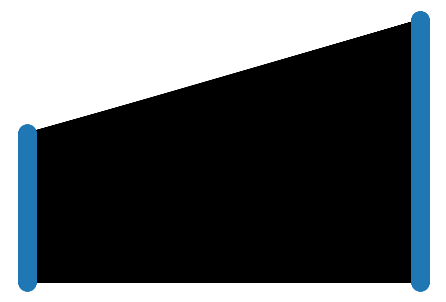

In [8]:
import matplotlib.pyplot as plt

l, r = bipartite.sets(B)

pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw(B, pos=pos, label=True)
plt.show()

In [9]:
# https://stackoverflow.com/questions/49095067/how-to-convert-weighted-edge-list-to-adjacency-matrix-in-python
from networkx.algorithms.bipartite.matrix import biadjacency_matrix

A = biadjacency_matrix(B, set(top_nodes))
adjacency_matrix = csr_matrix(A)
adjacency_matrix = csr_matrix(ratings)

<font color='cyan'>Grader function - 1</font>

In [10]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1662))
  return True
  
grader_matrix(adjacency_matrix)

True

<font color='red'>Write your code for SVD decompostion</font>

In [11]:
# Please use adjacency_matrix as matrix for SVD decompostion
from sklearn.utils.extmath import randomized_svd
import numpy as np 

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)

print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 2)
(2,)
(1662, 2)


<font color='red'>Compute mean of ratings</font>

In [12]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    return ratings.mean() 

In [13]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [14]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [15]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    return np.zeros((dim)).tolist()

In [16]:
dim= data.user_id.unique().shape# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [17]:
dim= data.item_id.unique().shape# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

len(b_i), len(c_j)

(943, 1662)

<font color='cyan'>Grader function -3 </font>

In [18]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1662 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$



<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


<font color='red'>Compute dL/db_i</font>

In [19]:
db_gradient = 0

predicted = np.dot(U, VT)

def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    
    user_index = user_ids.index(user_id)
    item_index = item_ids.index(item_id)
    
    user_bias = b_i[user_id]
    item_bias = c_j[item_index]
    
    cost = (2 * alpha * user_bias) - (2*(rating - mu - user_bias - item_bias - predicted[user_index, item_index]))
    
    return cost

<font color='cyan'>Grader function -4 </font>

In [20]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True

alpha=0.01 
value=derivative_db(312,98,4,U,VT,mu,alpha)
print(value)
grader_db(value)

-0.9308283758773338


True

<font color='red'>Compute dL/dc_j</font>

In [21]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    user_index = user_ids.index(user_id)
    item_index = item_ids.index(item_id)
    
    user_bias = b_i[user_id]
    item_bias = c_j[item_index]
    
    cost = (2 * alpha * item_bias) - (2*(rating - mu - user_bias - item_bias - predicted[user_index, item_index]))
    
    return cost

<font color='cyan'>Grader function - 5 </font>

In [22]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True

r=0.01 
value=derivative_dc(58,504,5,U,VT,mu,r)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [23]:
from sklearn.metrics import mean_squared_error

epochs = 500
alpha = 0.01
learning_rate = 0.01
mse = []
early_stopping = 5
epoch_list = []

for epoch in range(epochs):
    act_ratings = []
    pred_ratings = []
    for pair in data.itertuples():
        user_id = pair[1] 
        item_id = pair[2]
        act_ratings.append(pair[3])
        
        item_index = item_ids.index(item_id)
        
        user_bias = b_i[user_id]
        item_bias = c_j[item_index]
        
        cost = derivative_db(pair[1], pair[2], pair[3], U, VT, mu, alpha)
        b_i[user_id] = b_i[user_id]- (learning_rate*cost)
        
        cost = derivative_dc(pair[1], pair[2], pair[3], U, VT, mu, alpha)
        c_j[item_index] = c_j[item_index]- (learning_rate*cost)
        
        y_hat = mu + b_i[user_id] + c_j[item_index] + np.dot(b_i[user_id], c_j[item_index])
        pred_ratings.append(y_hat)
        
    MSE = mean_squared_error(np.asarray(act_ratings), np.asarray(pred_ratings))
    

    if epoch >= 10 and round(sum(mse[::-1][:early_stopping]) / early_stopping, 4) == mse[-1]:
        break;
            
    else:
        mse.append(round(MSE, 4))
        epoch_list.append(epoch)
        print(f'Epoch : {epoch+1}, MSE : {round(MSE, 4)}')

Epoch : 1, MSE : 0.9275
Epoch : 2, MSE : 0.8692
Epoch : 3, MSE : 0.8646
Epoch : 4, MSE : 0.8642
Epoch : 5, MSE : 0.8647
Epoch : 6, MSE : 0.8652
Epoch : 7, MSE : 0.8655
Epoch : 8, MSE : 0.8658
Epoch : 9, MSE : 0.8659
Epoch : 10, MSE : 0.8659
Epoch : 11, MSE : 0.8659
Epoch : 12, MSE : 0.8658
Epoch : 13, MSE : 0.8657
Epoch : 14, MSE : 0.8655
Epoch : 15, MSE : 0.8654
Epoch : 16, MSE : 0.8652
Epoch : 17, MSE : 0.865
Epoch : 18, MSE : 0.8648
Epoch : 19, MSE : 0.8646
Epoch : 20, MSE : 0.8645
Epoch : 21, MSE : 0.8643
Epoch : 22, MSE : 0.8641
Epoch : 23, MSE : 0.8639
Epoch : 24, MSE : 0.8637
Epoch : 25, MSE : 0.8635
Epoch : 26, MSE : 0.8633
Epoch : 27, MSE : 0.8631
Epoch : 28, MSE : 0.8629
Epoch : 29, MSE : 0.8628
Epoch : 30, MSE : 0.8626
Epoch : 31, MSE : 0.8624
Epoch : 32, MSE : 0.8623
Epoch : 33, MSE : 0.8621
Epoch : 34, MSE : 0.8619
Epoch : 35, MSE : 0.8618
Epoch : 36, MSE : 0.8616
Epoch : 37, MSE : 0.8615
Epoch : 38, MSE : 0.8613
Epoch : 39, MSE : 0.8612
Epoch : 40, MSE : 0.8611
Epoch : 41

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

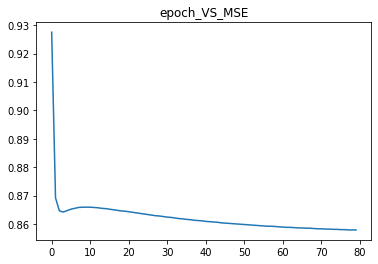

In [24]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, mse);
plt.title('epoch_VS_MSE');

<br>

<font color='red'> Task 2</font>

In [25]:
df = pd.read_csv("user_info.csv.txt")
df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


### USER - USER Vector

In [26]:
target = df['is_male']

df = df['age'].values

df = np.column_stack((df, U))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=2)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, return_train_score=True, scoring='f1')

result = grid.fit(df, target)

result.best_score_, result.best_params_

(0.8307520719958464, {'C': 0.001})

### USER - MOVIE Vector

In [28]:
predicted.shape

(943, 1662)

In [29]:
df = pd.read_csv("user_info.csv.txt")

target = df['is_male']

df = df['age'].values
df = np.column_stack((df, predicted))

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=2)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, return_train_score=True, scoring='f1')

result = grid.fit(df, target)

result.best_score_, result.best_params_

(0.8307520719958464, {'C': 0.001})

### USER - MOVIE vector after Scaling

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=2)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, return_train_score=True, scoring='f1')

result = grid.fit(df, target)

result.best_score_, result.best_params_

(0.8307520719958464, {'C': 0.001})

## CONCLUSION:

```
    1. USER - USER Vector before scaling - f1-Score - 83.07
    
    2. USER - MOVIE Vector before scaling - f1-Score - 83.07
    
    3. USER - MOVIE Vector after Scaling - f1-Score - 83.07
    
```

In [ ]:
jupyter nbconvert –to pdf Recommendation_system_assignment.ipynb